# OpenET SSEBop
## Image Class Property/Method Example
This example shows how to instantiate the model Image class for a single Landsat image using the ".from_landsat_c1_toa()" helper method.  This example also shows how to get the model variables.

## Setup

### Install Earth Engine

In [1]:
# Import the Earth Engine package, installing it first, if needed.
try:
  import ee
except ModuleNotFoundError:
  !pip install earthengine-api
  import ee

### Install SSEBop

In [2]:
# Import the SSEBop package, installing it first, if needed.
try:
  import openet.ssebop as model
except ModuleNotFoundError:
  !pip install openet-ssebop
  import openet.ssebop as model

### Package Imports

In [3]:
import pprint

from IPython.display import Image

### Initialize Earth Engine

In [4]:
# Initialize the Earth Engine package, initiating the authentication flow if needed.
try:
    ee.Initialize()
except ee.EEException:
    ee.Authenticate()
    ee.Initialize()

## Analysis

In [5]:
ndvi_palette = ['#EFE7E1', '#003300']
et_palette = [
    'DEC29B', 'E6CDA1', 'EDD9A6', 'F5E4A9', 'FFF4AD', 'C3E683', '6BCC5C', 
    '3BB369', '20998F', '1C8691', '16678A', '114982', '0B2C7A']

### Landsat 8 Collection 1 TOA Image

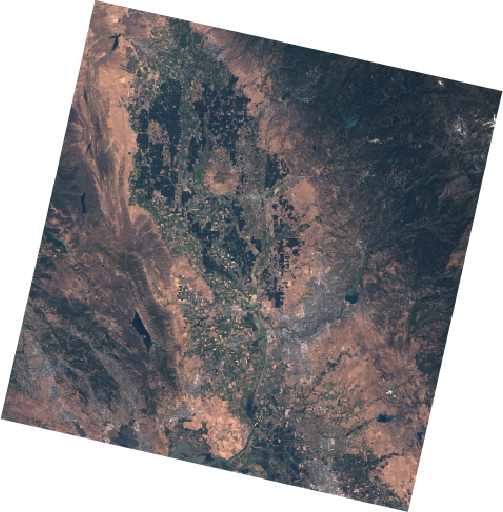

In [6]:
landsat_img = ee.Image('LANDSAT/LC08/C01/T1_RT_TOA/LC08_044033_20170716')
# landsat_img = ee.Image('LANDSAT/LC08/C01/T1_RT_TOA/LC08_044033_20170801')
Image(url=landsat_img.select([3, 2, 1]).getThumbURL({'min': 0.0, 'max': 0.3}), 
      embed=True, format='png')

In [7]:
print(landsat_img.get('system:time_start').getInfo())

1500230731090


In [8]:
landsat_cs = 30
landsat_crs = landsat_img.select('B3').projection().getInfo()['crs']
landsat_region = landsat_img.geometry().bounds(1, 'EPSG:4326').coordinates().getInfo()
landsat_dt = ee.Date(landsat_img.get('system:time_start'))

In [9]:
# Build the SSEBop object from the Landsat image
model_obj = model.Image.from_landsat_c1_toa(
    landsat_img, etr_source='projects/climate-engine/cimis/daily', etr_band='ETr_ASCE')
#     etr_source='IDAHO_EPSCOR/GRIDMET', etr_band='etr', etr_factor=0.85)

### NDVI

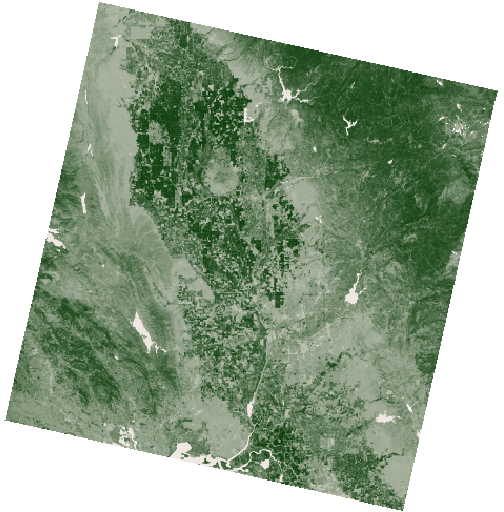

In [10]:
Image(url=model_obj.ndvi.getThumbURL({'min': -0.1, 'max': 0.9, 'palette': ndvi_palette}),
      embed=True, format='png')

### ET fraction

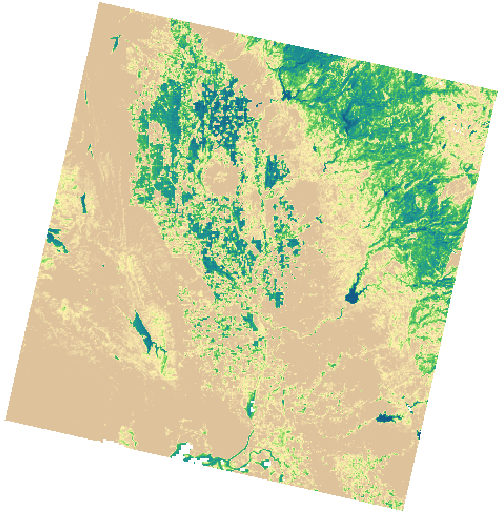

In [11]:
Image(url=model_obj.etf.getThumbURL({'min': 0.0, 'max': 1.2, 'palette': et_palette}),
      embed=True, format='png')

### Reference ET (from CIMIS)

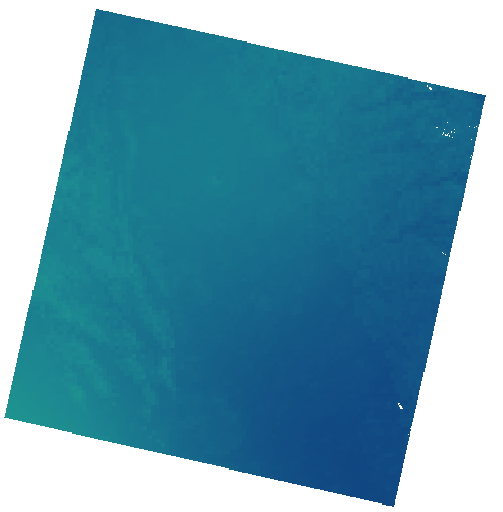

In [12]:
# Clip and project to the Landsat image footprint and coordinate system
Image(url=model_obj.etr.getThumbURL({'min': 0.0, 'max': 12, 'palette': et_palette, 'region': landsat_region}),
      embed=True, format='png')

# Reproject is needed if ETr isn't "applied" to the input image in the model code
#         .reproject(crs=landsat_crs, scale=landsat_cs)\


### ET

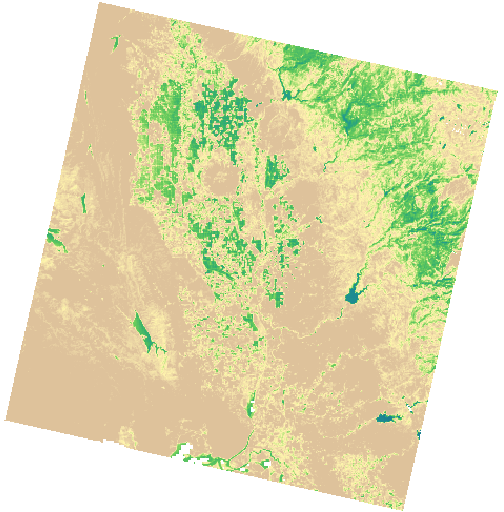

In [13]:
Image(url=model_obj.et.getThumbURL({'min': 0.0, 'max': 15, 'palette': et_palette}),
      embed=True, format='png')

### "Calculate" Method

Return a multiband image of the model variables

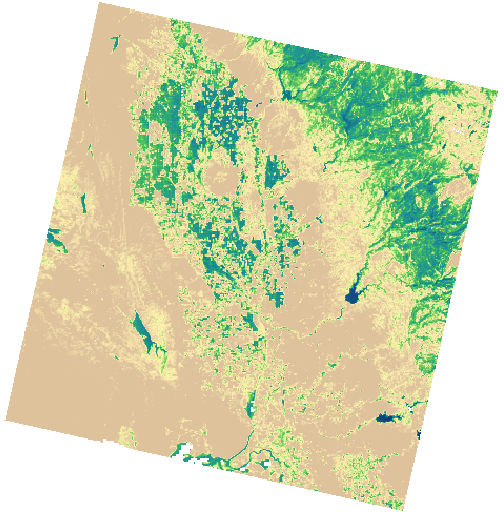

In [14]:
Image(url=model_obj.calculate(['et', 'etr', 'etf']).select(['et'])\
          .getThumbURL({'min': 0.0, 'max': 12, 'palette': et_palette}),
      embed=True, format='png')